In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df['Label'].value_counts()

M    111
R     97
Name: Label, dtype: int64

In [6]:
df['Target'] = df['Label'].map({'R': 0, 'M':1})

In [7]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [10]:
df.corr()['Target'].sort_values().tail(5)

Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [11]:
df = df.drop('Label', axis = 1)

In [12]:
## Train/ Test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('Target', axis=1)
y = df['Target']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn_model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
accuracy_score(y_test, y_pred)

0.9365079365079365

In [25]:
confusion_matrix(y_test, y_pred)

array([[27,  1],
       [ 3, 32]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.97      0.91      0.94        35

    accuracy                           0.94        63
   macro avg       0.93      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63



In [27]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [28]:
operations = [('scalar', scaler), ('knn', knn)]

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [34]:
pipe = Pipeline(operations)

In [35]:
k_values = list(range(1,30))

In [36]:
param_grid = {'knn__n_neighbors': k_values}

In [38]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [39]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [40]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scalar', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scalar': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [41]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.79310345, 0.7862069 , 0.73793103, 0.73103448, 0.68965517,
       0.69655172, 0.68275862, 0.67586207, 0.66896552, 0.68275862,
       0.68965517, 0.71034483, 0.67586207, 0.67586207, 0.68275862,
       0.67586207, 0.65517241, 0.70344828, 0.68275862, 0.69655172,
       0.68965517, 0.71034483, 0.68275862, 0.69655172, 0.66896552,
       0.69655172, 0.67586207, 0.68275862, 0.66206897])

Text(0, 0.5, 'Accuracy')

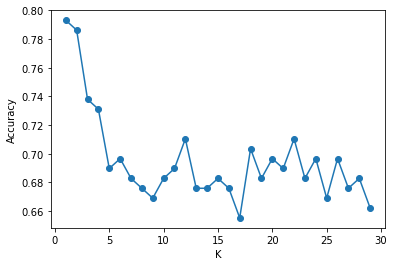

In [43]:
## Elbow Method
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values, scores, 'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [44]:
pred = full_cv_classifier.predict(X_test)

In [45]:
confusion_matrix(y_test,pred)

array([[27,  1],
       [ 3, 32]], dtype=int64)

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.97      0.91      0.94        35

    accuracy                           0.94        63
   macro avg       0.93      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

